###

### load data

In [1]:
import sys
sys.path.append('../src')
from src import load_data,dataset_overview,generate_summary_stats, analyze_missingness,analyze_categoricals,analyze_correlations,detect_outliers, plot_numerical_distributions

data_path  = '../data/raw/data.csv'
transactions_df = load_data(data_path)



✅ Data loaded successfully with 95662 records


### overview of the data

In [3]:
 # Generate overview
data_overview = dataset_overview(transactions_df)
print(data_overview)
print(f"Describe the data")
transactions_df.describe()
print(f"Information about the data")
transactions_df.info()

DATASET OVERVIEW
📊 Total Records: 95,662
📋 Features: 16
🧠 Memory Usage: 60.92 MB
🔍 Duplicates: 0

📝 Data Types:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
dtype: object
{'shape': (95662, 16), 'columns': ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'Pro

### generate summary  stats

In [5]:
  # Generate statistics
summary_stats = generate_summary_stats(transactions_df)


NUMERICAL FEATURE STATISTICS
                   count         mean            std        min       1%  \
CountryCode      95662.0   256.000000       0.000000      256.0    256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0 -30000.0   
Value            95662.0  9900.583941  123122.087776        2.0     10.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0      1.0   
FraudResult      95662.0     0.002018       0.044872        0.0      0.0   

                   25%     50%     75%      99%        max   skewness  \
CountryCode      256.0   256.0   256.0    256.0      256.0   0.000000   
Amount           -50.0  1000.0  2800.0  80000.0  9880000.0  51.098490   
Value            275.0  1000.0  5000.0  90000.0  9880000.0  51.291086   
PricingStrategy    2.0     2.0     2.0      4.0        4.0   1.659057   
FraudResult        0.0     0.0     0.0      0.0        1.0  22.196295   

                    kurtosis  
CountryCode         0.000000  
Amount      

In [6]:
print("Summary stats")
print(summary_stats)

Summary stats
{'numerical':                    count         mean            std        min       1%  \
CountryCode      95662.0   256.000000       0.000000      256.0    256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0 -30000.0   
Value            95662.0  9900.583941  123122.087776        2.0     10.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0      1.0   
FraudResult      95662.0     0.002018       0.044872        0.0      0.0   

                   25%     50%     75%      99%        max   skewness  \
CountryCode      256.0   256.0   256.0    256.0      256.0   0.000000   
Amount           -50.0  1000.0  2800.0  80000.0  9880000.0  51.098490   
Value            275.0  1000.0  5000.0  90000.0  9880000.0  51.291086   
PricingStrategy    2.0     2.0     2.0      4.0        4.0   1.659057   
FraudResult        0.0     0.0     0.0      0.0        1.0  22.196295   

                    kurtosis  
CountryCode         0.000000  
Amount        

AttributeError: `scipy.stats.stats` has no attribute `probplot`; furthermore, `scipy.stats.stats` is deprecated and will be removed in SciPy 2.0.0.

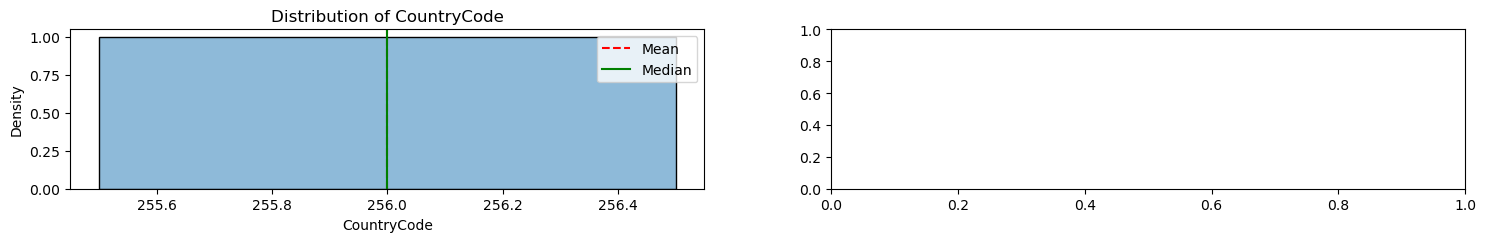

In [7]:
 # Run all EDA functions
plot_numerical_distributions(transactions_df)


/Users/worash/Desktop/tenx/week5/ecommerce-credit-scoring-model/src/eda_utils.py:154: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


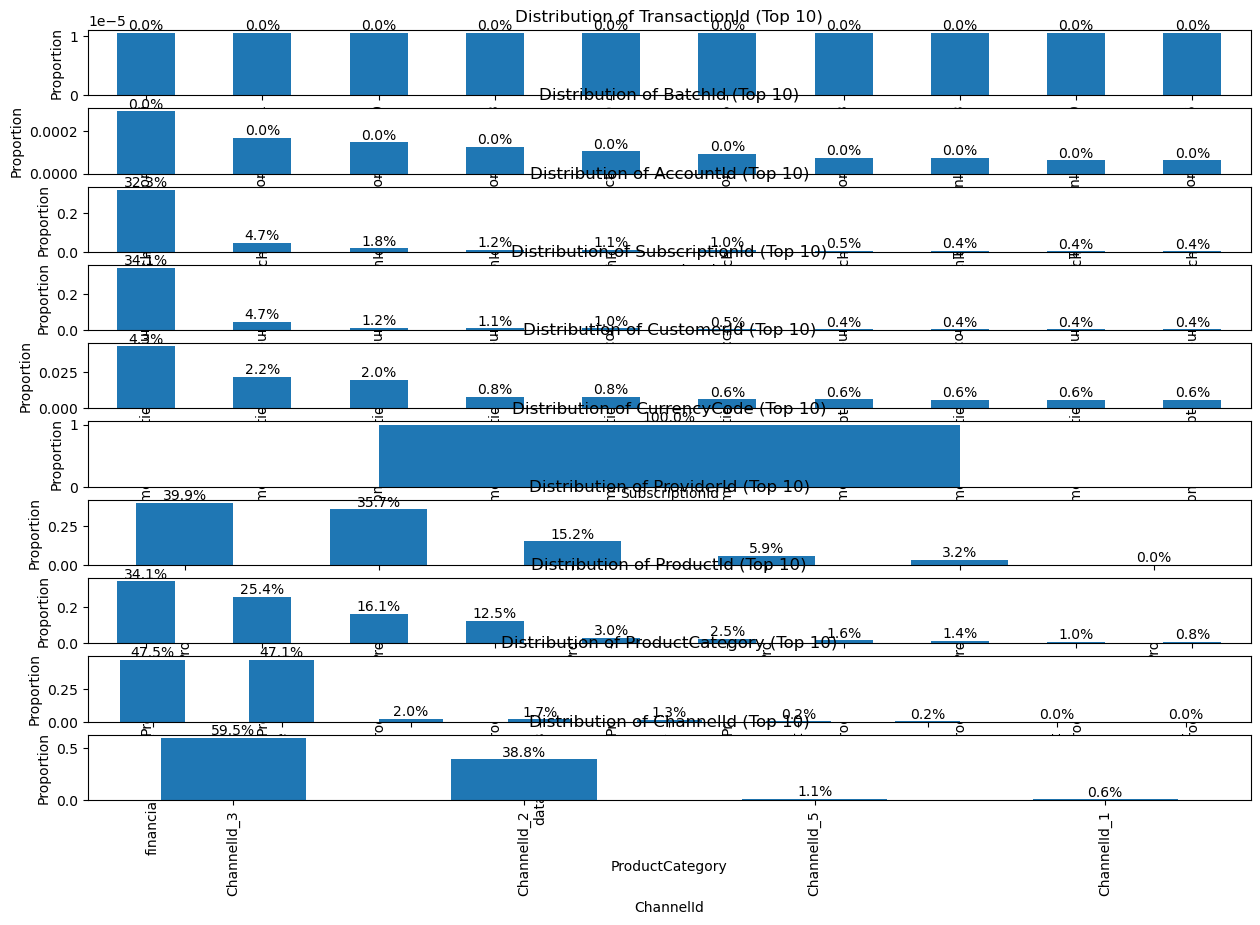

,Unique Values
TransactionId,95662
BatchId,94809
CustomerId,3742
AccountId,3633
SubscriptionId,3627
ProductId,23
ProductCategory,9
ProviderId,6
ChannelId,4
CurrencyCode,1


In [8]:
analyze_categoricals(transactions_df)


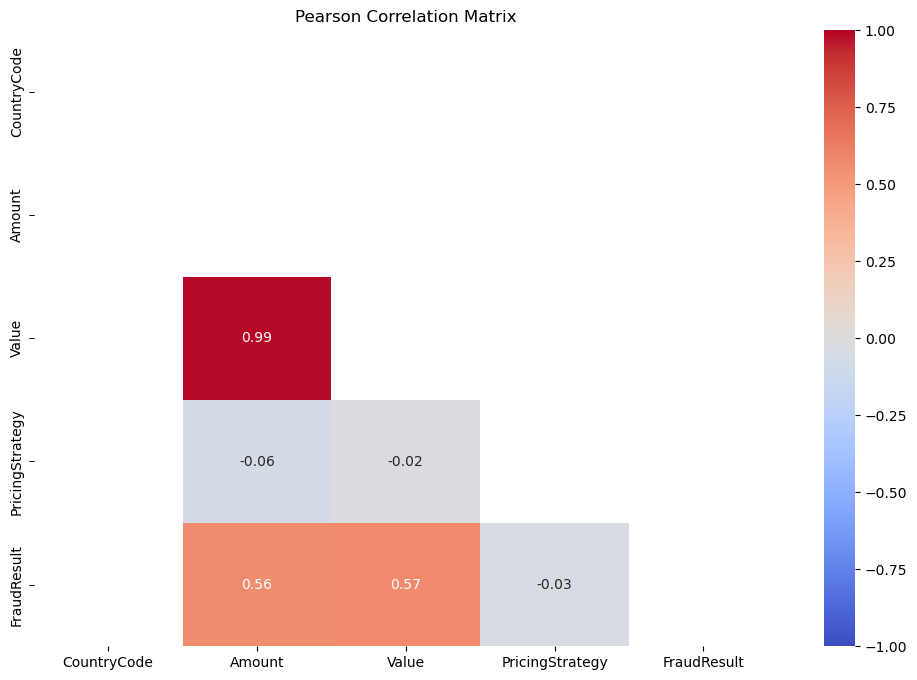

,Feature 1,Feature 2,Correlation
0,Amount,Value,0.989692
1,Value,Amount,0.989692


In [9]:
analyze_correlations(transactions_df)


In [10]:
analyze_missingness(transactions_df)


/Users/worash/Desktop/tenx/week5/ecommerce-credit-scoring-model/src/eda_utils.py:240: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z = np.abs(stats.zscore(df[col].dropna()))


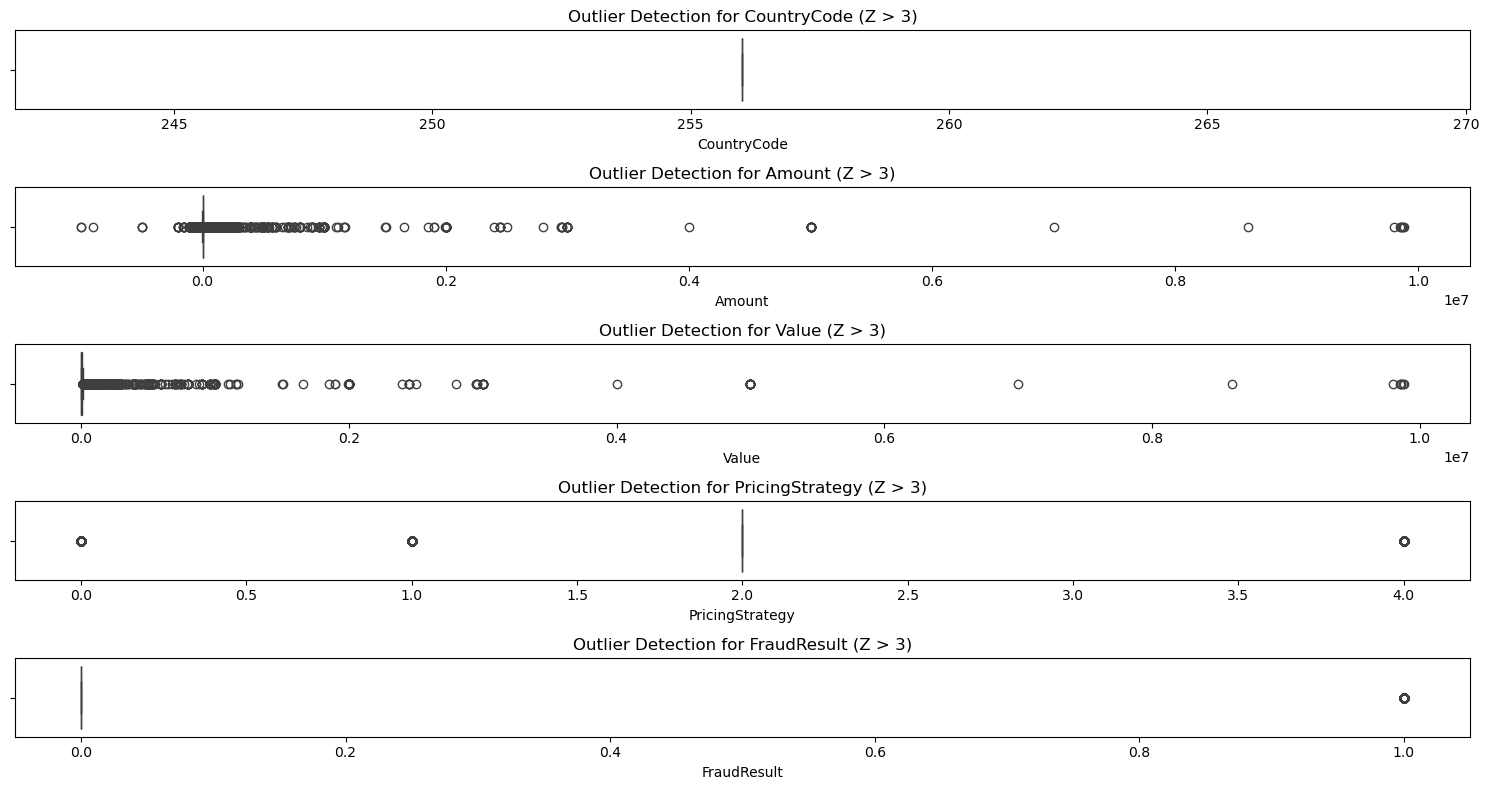

In [11]:
outlier_report = detect_outliers(transactions_df)